<a href="https://colab.research.google.com/github/Balav-Shamra/Google-Data-Analytics-Professional-Certificate/blob/main/Case_Study_1_Cyclistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study 1: Cyclistic-Bike Share Analysis**

###### *Author:* ***Balav Sharma***

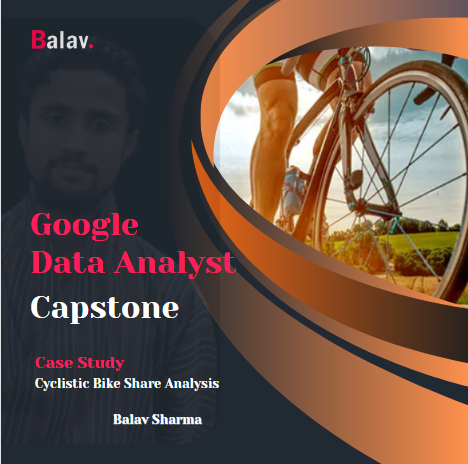

## **I. Introudction**

#### **Background:**
In 2016, Cyclistic launched its bike-share offering in Chicago, quickly expanding to become a prominent player in the city's transportation landscape. With a fleet of over 5,800 bicycles and 600 docking stations, Cyclistic prides itself on its inclusive approach, offering a diverse range of bikes to cater to various riders, including those with disabilities. As the program grew, so did the need for strategic marketing initiatives to sustain and enhance Cyclistic's market position.

#### **Project Scenario:**
As a junior data analyst on Cyclistic's marketing team, I'm tasked with addressing a critical business challenge: **maximizing annual memberships.** The director of marketing, Lily Moreno, believes that increasing the number of annual members is crucial for Cyclistic's future success. To achieve this goal, my team aims to gain a deep understanding of how casual riders and annual members utilize Cyclistic bikes differently. By analyzing historical trip data, the **objective is to identify insights that will inform the development of a targeted marketing strategy to convert casual riders into annual members.**

#### **Characters and Teams:**
*  **Cyclistic:** Operates a bike-share program with 5,800+ bicycles and 600 docking stations, offering various bike options including reclining, hand tricycles, and cargo bikes to enhance inclusivity. Majority opt for traditional bikes, while 8% use assistive options. Users primarily ride for leisure, but 30% commute daily.

*  **Lily Moreno:** Director of marketing responsible for developing campaigns and initiatives, utilizing channels like email and social media to promote the bike-share program.

*  **Cyclistic Marketing Analytics Team:** Data analysts responsible for collecting, analyzing, and reporting data to guide Cyclistic's marketing strategy. I, a junior data analyst, recently joined this team and are learning about Cyclistic’s mission and business goals.

*  **Cyclistic Executive Team:** Detail-oriented executives tasked with approving the recommended marketing program, ensuring alignment with Cyclistic's goals.

------
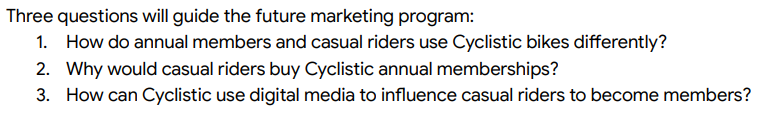

------

## **II. Phase 1 - ASK**

#### **Problem Statement:**
*  The primary problem revolves around maximizing annual memberships at
   Cyclistic, which is believed to be crucial for the company's future success.
*  Specifically, the team aims to understand the differences in bike usage
   patterns between casual riders and annual members to design a targeted marketing strategy for conversion.

#### **Analysis Approach:**
*  The analysis will involve examining Cyclistic's historical bike trip data to
   identify trends and patterns in usage between casual riders and annual members.
*  Data-driven insights will be essential for creating compelling marketing
   recommendations backed by evidence.

#### **Stakeholders:**
*  Lily Moreno: Director of Marketing, responsible for approving marketing
   strategies.
*  Cyclistic Marketing Analytics Team: Data analysts involved in data  collection and analysis.
*  Cyclistic Executive Team: Decision-makers who will evaluate and approve the
   recommended marketing program.

#### **Business/Key Question:**
*  **How do annual members and casual riders use Cyclistic bikes differently ?**

#### **Project Objective:**
*  Design marketing strategies aimed at converting casual riders into
   annual members.

## **III. Phase 2 - PREPARE**

#### **Data Sources:**

*  To answer this question, I will utilize data from the previous 12 months
  (between April 2022 to March 2023) of Cyclistic's historical trip data.
*  The data, although fictional for Cyclistic, is sourced from a real company
   provided by Motivate International Inc. under this [license](https://divvybikes.com/data-license-agreement).
*  You can access the dataset from [here](https://divvy-tripdata.s3.amazonaws.com/index.html).

#### **Data Organization:**

*  The data comprises CSV files containing details such as trip  
   duration, start and end times, user types (casual rider or annual member), and other relevant attributes.

##### **I) Download the Cyclistic's historical trip data and merge all files into a Dataframe**

In [4]:
# Import required libraries
library('readr')
library('readxl')
library('tidyverse')
library('ggplot2')
library('stringr')
library('scales')


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




## **IV. Phase 3 - PROCESS**

## **V. Phase 4 - ANALYZE**

## **VI. Phase 5 - SHARE**

## **VII. Phase 6 - ACT(Recommendations)**

## **VIII. Conclustion**